In [1]:
# reference : https://statisticsglobe.com/biplot-pca-python (Statistics Globe)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
def biplot(score, coef, labels = None):
 
    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    
    xm_scalex = xs.max() * scalex
    ym_scalex = ys.max() * scaley
    if(xm_scalex > ym_scalex):
        plt.xlim(-xm_scalex, xm_scalex)
        plt.ylim(-xm_scalex, xm_scalex)
    else :
        plt.xlim(-ym_scalex, ym_scalex)
        plt.ylim(-ym_scalex, ym_scalex)
        
    plt.scatter(xs * scalex, -ys * scaley, s = 5, color = 'orange')
    # 数学的には問題無い（固有ベクトルの正負）が，Rのbiplot関数と出力を同じにするため，ys * scaleyに'-'を掛けている．
 
    for i in range(n): # 数学的には問題無い（固有ベクトルの正負）が，Rのbiplot関数と出力を同じにするため，coef[i,1]に'-'を掛けている．
        plt.arrow(0, 0, coef[i,0], -coef[i,1], color = 'purple', alpha = 0.5)
        plt.text(coef[i,0], -coef[i,1], labels[i], color = 'darkblue', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    

    plt.figure()

In [4]:
iris = datasets.load_iris()
df = pd.DataFrame(data = iris.data[50:100, :], columns = iris.feature_names)

scaler = StandardScaler()
scaler.fit(df) 
iris_scaled = scaler.transform(df)

pca = PCA(n_components =2)
PCscore = pca.fit_transform(iris_scaled)
PCvector = pca.components_.T

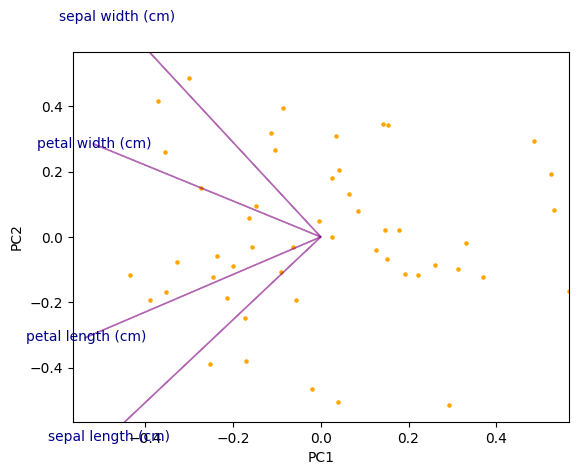

<Figure size 640x480 with 0 Axes>

In [5]:
biplot(PCscore, PCvector, list(iris.feature_names))